In [19]:
import library

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv(('adult.csv'))

In [22]:
df.replace({'<=50K': 0, '>50K': 1}, inplace=True)

In [23]:
X = df.drop("income", axis = 1)
y = df["income"]

In [24]:
from sklearn.model_selection import train_test_split


In [1]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 44)

NameError: name 'train_test_split' is not defined

In [26]:
model = library.EconomicTabularAnonymizer()

In [27]:
X = model.encode(X)

In [28]:
X_train = model.encode(X_train)

In [29]:
X_test= model.encode(X_test)

In [30]:
X.head()

,education,marital-status,occupation,relationship,race,gender,native-country
0,5.0,0.0,7.0,5.0,2.0,1.0,39.0
1,8.0,6.0,5.0,4.0,4.0,1.0,39.0
2,15.0,6.0,11.0,4.0,4.0,1.0,39.0
3,10.0,6.0,7.0,4.0,2.0,1.0,39.0
4,10.0,0.0,0.0,5.0,4.0,0.0,39.0


In [31]:
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

In [32]:
import torch

In [33]:
import numpy as np

In [34]:
model.fit(X_train, y_train)

       education  marital-status  occupation  relationship  race  gender  \
26224       10.0             0.0        14.0           0.0   4.0     1.0   
28093       11.0             3.0         4.0           0.0   2.0     0.0   
22602       10.0             0.0        12.0           5.0   1.0     1.0   
2584        12.0             2.0         0.0           1.0   4.0     0.0   
46920       11.0             6.0         1.0           4.0   4.0     1.0   
...          ...             ...         ...           ...   ...     ...   
19183        8.0             6.0         6.0           4.0   4.0     1.0   
4180         8.0             2.0         3.0           0.0   3.0     1.0   
25773        8.0             2.0         8.0           1.0   4.0     0.0   
3491        12.0             6.0        10.0           4.0   4.0     1.0   
14100       10.0             2.0         3.0           0.0   4.0     1.0   

       native-country  TEMP_TARGET  
26224            39.0            0  
28093        

Fitting CTGAN transformers for each column:   0%|          | 0/8 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/50 [00:00<?, ?it/s]

In [37]:
X_train

,education,marital-status,occupation,relationship,race,gender,native-country
26224,10.0,0.0,14.0,0.0,4.0,1.0,39.0
28093,11.0,3.0,4.0,0.0,2.0,0.0,39.0
22602,10.0,0.0,12.0,5.0,1.0,1.0,19.0
2584,12.0,2.0,0.0,1.0,4.0,0.0,0.0
46920,11.0,6.0,1.0,4.0,4.0,1.0,39.0
...,...,...,...,...,...,...,...
19183,8.0,6.0,6.0,4.0,4.0,1.0,39.0
4180,8.0,2.0,3.0,0.0,3.0,1.0,7.0
25773,8.0,2.0,8.0,1.0,4.0,0.0,39.0
3491,12.0,6.0,10.0,4.0,4.0,1.0,39.0


In [38]:
X_gen, y_gen = model.generate()

(50, 8)
ququ
[LightGBM] [Info] Number of positive: 30, number of negative: 29
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 128
[LightGBM] [Info] Number of data points in the train set: 59, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508475 -> initscore=0.033902
[LightGBM] [Info] Start training from score 0.033902
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [39]:
X_gen.head()

,education,marital-status,occupation,relationship,race,gender,native-country
0,11.171486,5.918867,8.175455,4.000142,3.979991,-0.015370,39.136607
1,9.963183,2.156576,5.848282,4.854009,3.245456,0.030016,26.040999
2,3.295617,5.891937,13.374351,5.060386,1.869364,-0.002566,37.944636
3,12.187846,1.823140,4.089604,2.983402,2.006013,0.021711,39.163138
4,11.108275,2.052536,12.270488,4.073816,1.268125,0.023674,38.814124


In [40]:
from xgboost import XGBClassifier

In [41]:
cls_synth = XGBClassifier()

In [42]:
cls_synth.fit(X_gen, y_gen)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
from matplotlib import pyplot as plt

Text(0.5, 0, 'Xgboost Feature Importance')

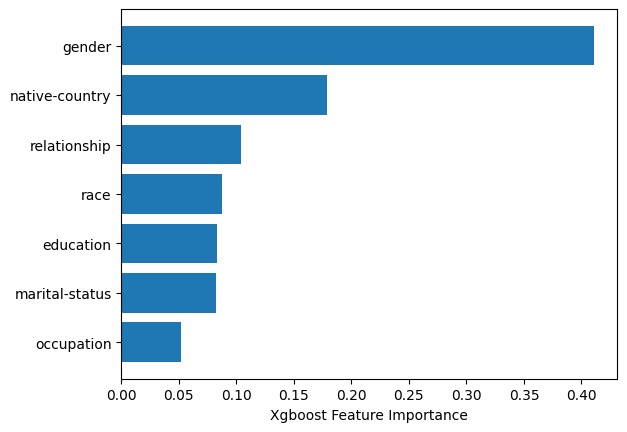

In [44]:
sorted_idx = cls_synth.feature_importances_.argsort()
plt.barh(X_gen.columns[sorted_idx], cls_synth.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [45]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [21]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort

# Fit model using each importance as a threshold
thresholds = sort(cls_synth.feature_importances_)
for thresh in thresholds:
 # select features using threshold
 selection = SelectFromModel(cls_synth, threshold=thresh, prefit=True)
 select_X_train = selection.transform(X_gen)
 # train model
 selection_model = XGBClassifier()
 selection_model.fit(select_X_train, y_gen)
 # eval model
 select_X_test = selection.transform(X_test)
 y_pred = selection_model.predict(select_X_test)
 predictions = [round(value) for value in y_pred]
 f1 = f1_score(y_test, predictions)
 print("Thresh=%.5f, n=%d, F1 score: %.2f%%" % (thresh, select_X_train.shape[1], f1*100.0))


Thresh=0.04512, n=7, F1 score: 0.51%
Thresh=0.06583, n=6, F1 score: 1.16%
Thresh=0.09185, n=5, F1 score: 1.87%
Thresh=0.09547, n=4, F1 score: 4.82%
Thresh=0.11608, n=3, F1 score: 2.59%
Thresh=0.19999, n=2, F1 score: 3.43%
Thresh=0.38567, n=1, F1 score: 44.11%


In [24]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort

# Fit model using each importance as a threshold
thresholds = sort(cls_synth.feature_importances_)
for thresh in thresholds:
 # select features using threshold
 selection = SelectFromModel(cls_synth, threshold=thresh, prefit=True)
 select_X_train = selection.transform(X_gen)
 # train model
 selection_model = XGBClassifier()
 selection_model.fit(select_X_train, y_gen)
 # eval model
 select_X_test = selection.transform(X_test)
 y_pred = selection_model.predict(select_X_test)
 predictions = [round(value) for value in y_pred]
 f1 = f1_score(y_test, predictions)
 print("Thresh=%.5f, n=%d, F1 score: %.2f%%" % (thresh, select_X_train.shape[1], f1*100.0))


Thresh=0.07296, n=7, F1 score: 3.68%
Thresh=0.08963, n=6, F1 score: 10.45%
Thresh=0.09586, n=5, F1 score: 33.88%
Thresh=0.14161, n=4, F1 score: 43.13%
Thresh=0.16276, n=3, F1 score: 25.68%
Thresh=0.19704, n=2, F1 score: 53.87%
Thresh=0.24014, n=1, F1 score: 42.06%


In [44]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort

# Fit model using each importance as a threshold
thresholds = sort(cls_synth.feature_importances_)
for thresh in thresholds:
 # select features using threshold
 selection = SelectFromModel(cls_synth, threshold=thresh, prefit=True)
 select_X_train = selection.transform(X_gen)
 # train model
 selection_model = XGBClassifier()
 selection_model.fit(select_X_train, y_gen)
 # eval model
 select_X_test = selection.transform(X_test)
 y_pred = selection_model.predict(select_X_test)
 predictions = [round(value) for value in y_pred]
 f1 = f1_score(y_test, predictions)
 print("Thresh=%.5f, n=%d, F1 score: %.2f%%" % (thresh, select_X_train.shape[1], f1*100.0))


Thresh=0.10188, n=7, F1 score: 35.37%
Thresh=0.11097, n=6, F1 score: 20.41%
Thresh=0.11545, n=5, F1 score: 21.52%
Thresh=0.14440, n=4, F1 score: 47.28%
Thresh=0.16259, n=3, F1 score: 55.48%
Thresh=0.16717, n=2, F1 score: 0.00%
Thresh=0.19755, n=1, F1 score: 12.71%


с postprocessing

In [45]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort

# Fit model using each importance as a threshold
thresholds = sort(cls_synth.feature_importances_)
for thresh in thresholds:
 # select features using threshold
 selection = SelectFromModel(cls_synth, threshold=thresh, prefit=True)
 select_X_train = selection.transform(X_gen)
 # train model
 selection_model = XGBClassifier()
 selection_model.fit(select_X_train, y_gen)
 # eval model
 select_X_test = selection.transform(X_test)
 y_pred = selection_model.predict(select_X_test)
 predictions = [round(value) for value in y_pred]
 f1 = f1_score(y_test, predictions)
 print("Thresh=%.5f, n=%d, F1 score: %.2f%%" % (thresh, select_X_train.shape[1], f1*100.0))


Thresh=0.08274, n=7, F1 score: 42.99%
Thresh=0.10132, n=6, F1 score: 46.34%
Thresh=0.12073, n=5, F1 score: 37.91%
Thresh=0.14623, n=4, F1 score: 44.87%
Thresh=0.15187, n=3, F1 score: 47.50%
Thresh=0.19661, n=2, F1 score: 28.15%
Thresh=0.20050, n=1, F1 score: 44.11%


In [46]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort

# Fit model using each importance as a threshold
thresholds = sort(cls_synth.feature_importances_)
for thresh in thresholds:
 # select features using threshold
 selection = SelectFromModel(cls_synth, threshold=thresh, prefit=True)
 select_X_train = selection.transform(X_gen)
 # train model
 selection_model = XGBClassifier()
 selection_model.fit(select_X_train, y_gen)
 # eval model
 select_X_test = selection.transform(X_test)
 y_pred = selection_model.predict(select_X_test)
 predictions = [round(value) for value in y_pred]
 f1 = f1_score(y_test, predictions)
 print("Thresh=%.5f, n=%d, F1 score: %.2f%%" % (thresh, select_X_train.shape[1], f1*100.0))


Thresh=0.05229, n=7, F1 score: 44.13%
Thresh=0.08277, n=6, F1 score: 43.43%
Thresh=0.08355, n=5, F1 score: 44.11%
Thresh=0.08741, n=4, F1 score: 44.11%
Thresh=0.10424, n=3, F1 score: 11.55%
Thresh=0.17922, n=2, F1 score: 44.11%
Thresh=0.41053, n=1, F1 score: 44.11%


In [47]:
from ignite.metrics import FID